
#### Ejercicio 1: 
#### Dataset pequeño de frutas, Manzanas y Naranjas.
#### un dataset sencillo con dos características (Peso, Color) y una etiqueta (Clase).
#### Pasos:
#### 1. Carga el archivo CSV en un DataFrame de pandas.
#### 2. Separa en X (características) e y (etiquetas).
#### 3. Divide en entrenamiento y prueba con train_test_split.
#### 4. Entrena un clasificador (ej. KNN).
#### 5. Calcula la matriz de confusión.
#### 6. Calcula métricas de rendimiento desde sklearn.metrics: accuracy, precision, recall y f1.


#### Librerias a usar

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

['Peso' 'Color' 'Clase']


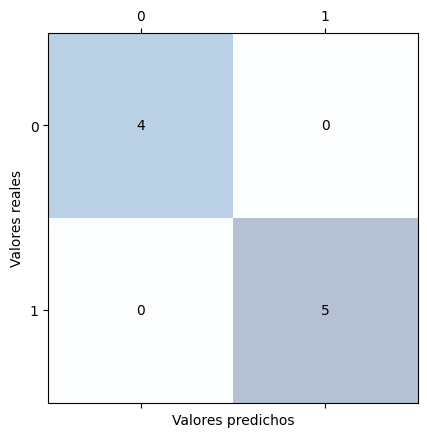

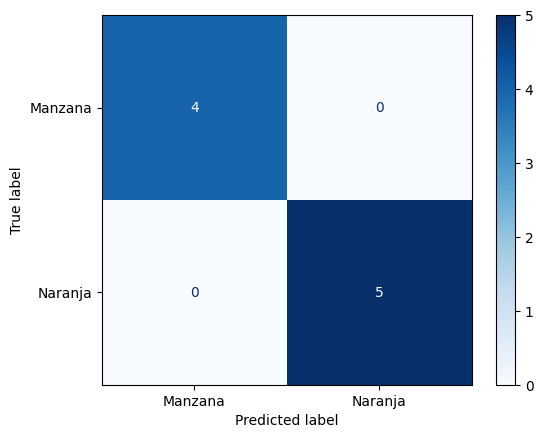

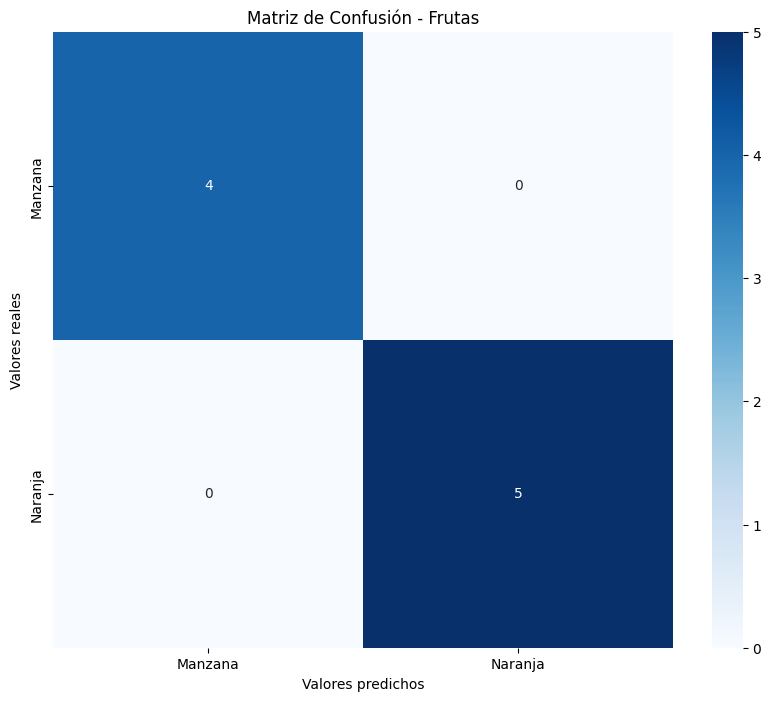

Metricas: 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
nuevas Predicciones: ['Manzana' 'Naranja' 'Naranja' 'Naranja' 'Naranja' 'Naranja' 'Manzana']


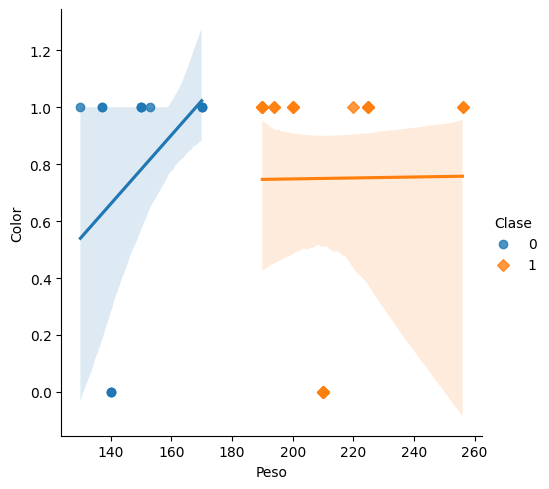

In [4]:
data_ejercicio = pd.read_csv(r"C:\Users\Usuario\OneDrive\Python\000Curso Machine Learning - Python\Ejercicios\ejercicios matriz de confusion\frutas_dataset.csv")
print(data_ejercicio.columns.values)

x = data_ejercicio[['Peso', 'Color']]
y = data_ejercicio['Clase']

# Mapear clases 0 y 1 a nombres, esto en el caso que el CSV noe este etiquetado con los nombres
#Con seaborn.heatmap no existe ese problema porque tú mismo defines xticklabels y yticklabels, pero con ConfusionMatrixDisplay 
# depende de lo que tenga knn.classes_
mapa = {0: "Manzana", 1: "Naranja"}
y = data_ejercicio['Clase'].map(mapa)

#dividiendo en Train y test
X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=42)

# entrenando un clasificador
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

#Realización de predicciones sobre el conjunto de datos de prueba
predic_test= knn.predict(X_test)


#llamada a la matriz de confusion
matr_confusion = confusion_matrix(y_true=y_test, y_pred=predic_test, labels=knn.classes_)



#Trazado de la matriz de confusión
fig, ax = plt.subplots()
ax.matshow(matr_confusion, cmap=plt.cm.Blues,alpha=0.3)
for i in range(matr_confusion.shape[0]):
    for j in range(matr_confusion.shape[1]):
        ax.text(x=i, y=j, s=matr_confusion[i,j],va='center',ha='center')
        plt.xlabel("Valores predichos")
        plt.ylabel("Valores reales")

#Trazado de la matriz de confusión con ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matr_confusion, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

#Trazado de la matriz de confusión con sns.heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matr_confusion, annot=True, fmt="d", cmap="Blues", 
            xticklabels=knn.classes_, yticklabels=knn.classes_)


plt.title("Matriz de Confusión - Frutas")
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

print('Metricas: ')
print("Accuracy:", accuracy_score(y_test, predic_test))
print("Precision:", precision_score(y_test, predic_test, average="macro"))
print("Recall:", recall_score(y_test, predic_test, average="macro"))
print("F1-score:", f1_score(y_test, predic_test, average="macro"))

sns.lmplot(
    x='Peso', 
    y='Color', 
    data=data_ejercicio, 
    hue='Clase',    # Colorea por especie
    fit_reg=True,     # Línea de regresión
    markers=['o','D'],  # Distintos marcadores por especie
    height=5
)

# Nuevos valores (peso, color) que no tienen clase
nuevas_frutas = pd.DataFrame({
    'Peso': [150, 200, 233, 350, 360, 370, 160],
    'Color': [1, 2, 1, 0, 1, 0, 3]   # según cómo esté codificado en tu dataset
})

# Usar el modelo entrenado para predecir
n_predicciones = knn.predict(nuevas_frutas)

print("nuevas Predicciones:", n_predicciones)

plt.show()

In [ ]:
'''
Cómo guardar y cargar un modelo en scikit-learn
1. Con joblib (recomendado)
import joblib

# Guardar modelo entrenado
joblib.dump(knn, "modelo_frutas.pkl")

# Cargar modelo en otra sesión
modelo_cargado = joblib.load("modelo_frutas.pkl")

# Usar el modelo cargado para predecir
nuevas_frutas = pd.DataFrame({'Peso': [180], 'Color': [2]})
print(modelo_cargado.predict(nuevas_frutas))

'''